<h1><font color=darkred size=6><center> $\fbox{Classification Multimodale - Rakuten}$ </center></h1>
<font color=dimgrey size=3><center> $Bryan, \space Rizlène, \space Romain\space et \space Steeve$ </center></h1>

# Table des matières

## [Importation des librairies](#Imp)

## [Prediction](#Prediction)

## [Enrichissement du jeu de données textuels](#Enrichissement)

## [Bibliographies](#Bibli)

<h2><font size=6> Importation des librairies<a name="Imp"></a></h2>

In [32]:
import os
import csv
import warnings

from PIL import Image, ImageFilter
from IPython.display import display
import numpy as np
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import random
import torch
import seaborn as sns
import cv2
from torchvision import transforms, models

warnings.filterwarnings('ignore')
pd.options.display.max_rows = 500
pd.options.display.max_columns = None

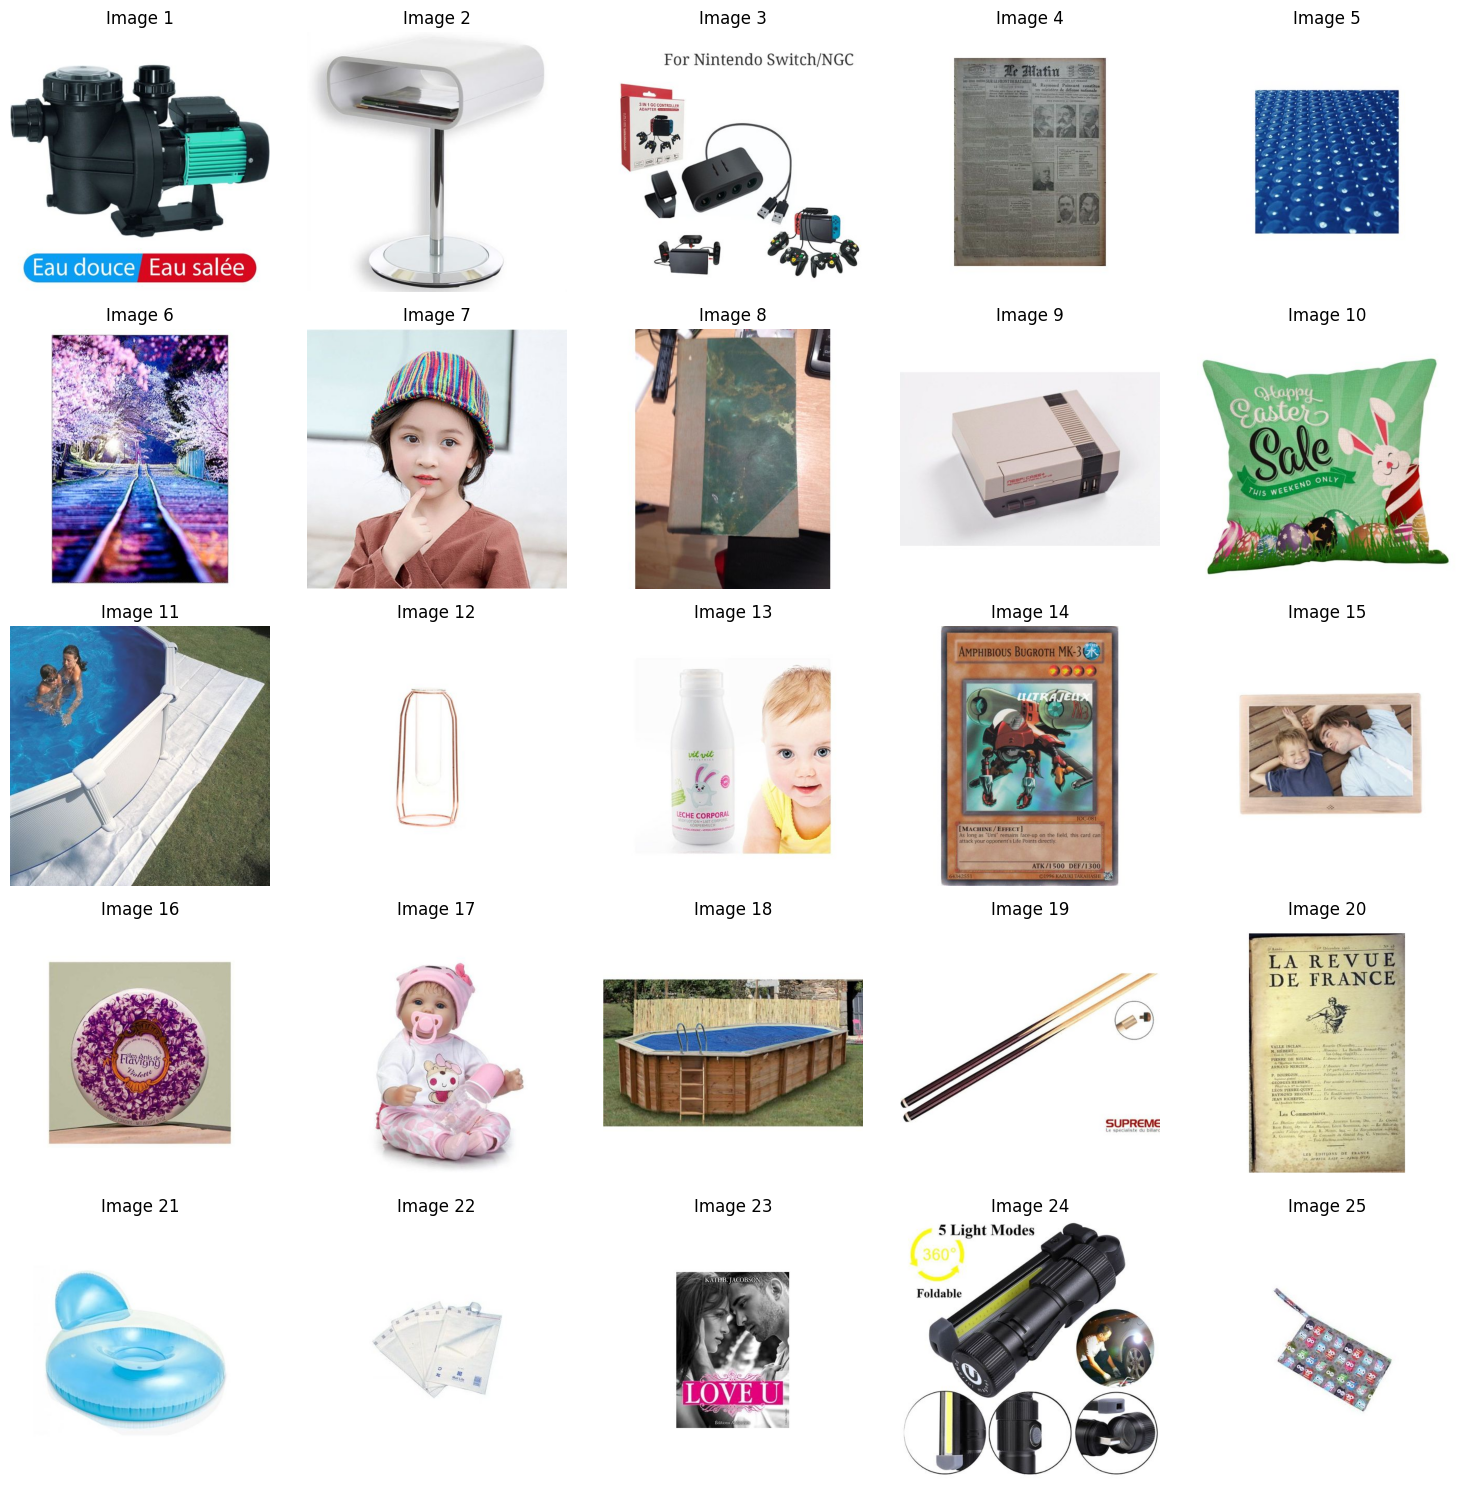

In [33]:
# Chemin vers le dossier contenant les images
dossier_images = "/Users/grizzly/Desktop/DataScientest/rakuten-multimodal-classification/data/images/image_train"

# Liste des fichiers dans le dossier
fichiers_images = os.listdir(dossier_images)

# Filtrer pour ne garder que les fichiers d'images (par exemple, .jpg)
fichiers_images = [f for f in fichiers_images if f.endswith('.jpg')]

# Prendre les 25 premières images
images_a_afficher = fichiers_images[:25]

# Créer une figure pour afficher les images
plt.figure(figsize=(15, 15))

for i, fichier in enumerate(images_a_afficher):
    # Ouvrir l'image
    image = Image.open(os.path.join(dossier_images, fichier))

    # Ajouter une sous-figure
    plt.subplot(5, 5, i + 1)  # 2 lignes, 3 colonnes
    plt.imshow(image)
    plt.axis('off')  # Ne pas afficher les axes
    plt.title(f"Image {i+1}")  # Titre avec le nom du fichier

# Afficher toutes les images
plt.tight_layout()
plt.show()

(Sauvegarder en tant que yolo_img1.png)

Description du modèle :

Le modèle ResNet101 (Residual Network 101) est un modèle de classification d'images qui utilise une architecture profonde avec 101 couches. Il a été conçu pour résoudre le problème de la dégradation des performances des réseaux de neurones profonds en introduisant des connexions résiduelles.
Fonctionnalités du modèle :

- Classification d'images : ResNet101 est capable de classer des images en différentes catégories, ce qui le rend utile pour des tâches telles que la reconnaissance d'objets et la classification d'images.
- Connexions résiduelles : L'architecture de ResNet101 intègre des connexions résiduelles qui permettent de contourner certaines couches, facilitant ainsi l'apprentissage de représentations plus profondes et réduisant le risque de surapprentissage.
- Performance : Grâce à sa profondeur et à ses connexions résiduelles, ResNet101 atteint des performances élevées sur des ensembles de données complexes, comme ImageNet, tout en maintenant une efficacité computationnelle.
- Transfert d'apprentissage : ResNet101 est souvent utilisé comme modèle de base pour le transfert d'apprentissage, permettant d'adapter le modèle à des tâches spécifiques avec moins de données d'entraînement.

Ce modèle est largement utilisé dans le domaine de la vision par ordinateur en raison de sa capacité à apprendre des caractéristiques complexes à partir d'images tout en restant efficace.


Nous avons eu l'idée d'utiliser le modèle ResNet101 pour enrichir notre jeu de données textuels. En effet, en effectuant une prédiction sur chaque image à l'aide de ResNet101, nous pourrions ajouter des informations supplémentaires concernant les classes d'objets présentes dans les images. Cela pourrait aider notre modèle final à mieux comprendre le contenu des images et à prédire la bonne classe associée à chaque image.

Regardons les prédictions du modèle ResNet101 sur nos 25 premières images.

<h2><font size=6> Prediction <a name="Prediction"></a></h2>

In [34]:
# Charger le modèle ResNet101
resnet101_model = models.resnet101(pretrained=True)

In [35]:
# Create a preprocessing pipeline
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

In [36]:
for i, fichier in enumerate(images_a_afficher):
    print(f"\nImage {i+1}/25 :")
    image = Image.open(os.path.join(dossier_images, fichier))

    img_preprocessed = preprocess(image)

    batch_img_tensor = torch.unsqueeze(img_preprocessed, 0)

    resnet101_model.eval()    
    out = resnet101_model(batch_img_tensor)
    with open("/Users/grizzly/Desktop/DataScientest/rakuten-multimodal-classification/data/imagenet_classes.txt") as f:
        labels = [line.strip() for line in f.readlines()]

    _, index = torch.max(out, 1)

    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

    print(labels[index[0]], percentage[index[0]].item())

    _, indices = torch.sort(out, descending=True)
    [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]


Image 1/25 :
binoculars, field glasses, opera glasses 49.23406219482422

Image 2/25 :
paper towel 25.672367095947266

Image 3/25 :
radio, wireless 86.9571533203125

Image 4/25 :
book jacket, dust cover, dust jacket, dust wrapper 59.111083984375

Image 5/25 :
shower curtain 66.88936614990234

Image 6/25 :
bannister, banister, balustrade, balusters, handrail 67.00912475585938

Image 7/25 :
bonnet, poke bonnet 32.02659606933594

Image 8/25 :
cleaver, meat cleaver, chopper 47.02511978149414

Image 9/25 :
modem 63.78094482421875

Image 10/25 :
pillow 61.90531921386719

Image 11/25 :
tub, vat 60.3191032409668

Image 12/25 :
safety pin 14.466726303100586

Image 13/25 :
lotion 62.662635803222656

Image 14/25 :
comic book 57.101295471191406

Image 15/25 :
crate 41.52848815917969

Image 16/25 :
face powder 43.640716552734375

Image 17/25 :
nipple 37.427955627441406

Image 18/25 :
tub, vat 68.4773178100586

Image 19/25 :
drumstick 28.263456344604492

Image 20/25 :
book jacket, dust cover, dust j

Comme mentionné précédemment, le modèle ResNet nous permet de détecter l'objet présent dans une image. Affichons nos prédictions :

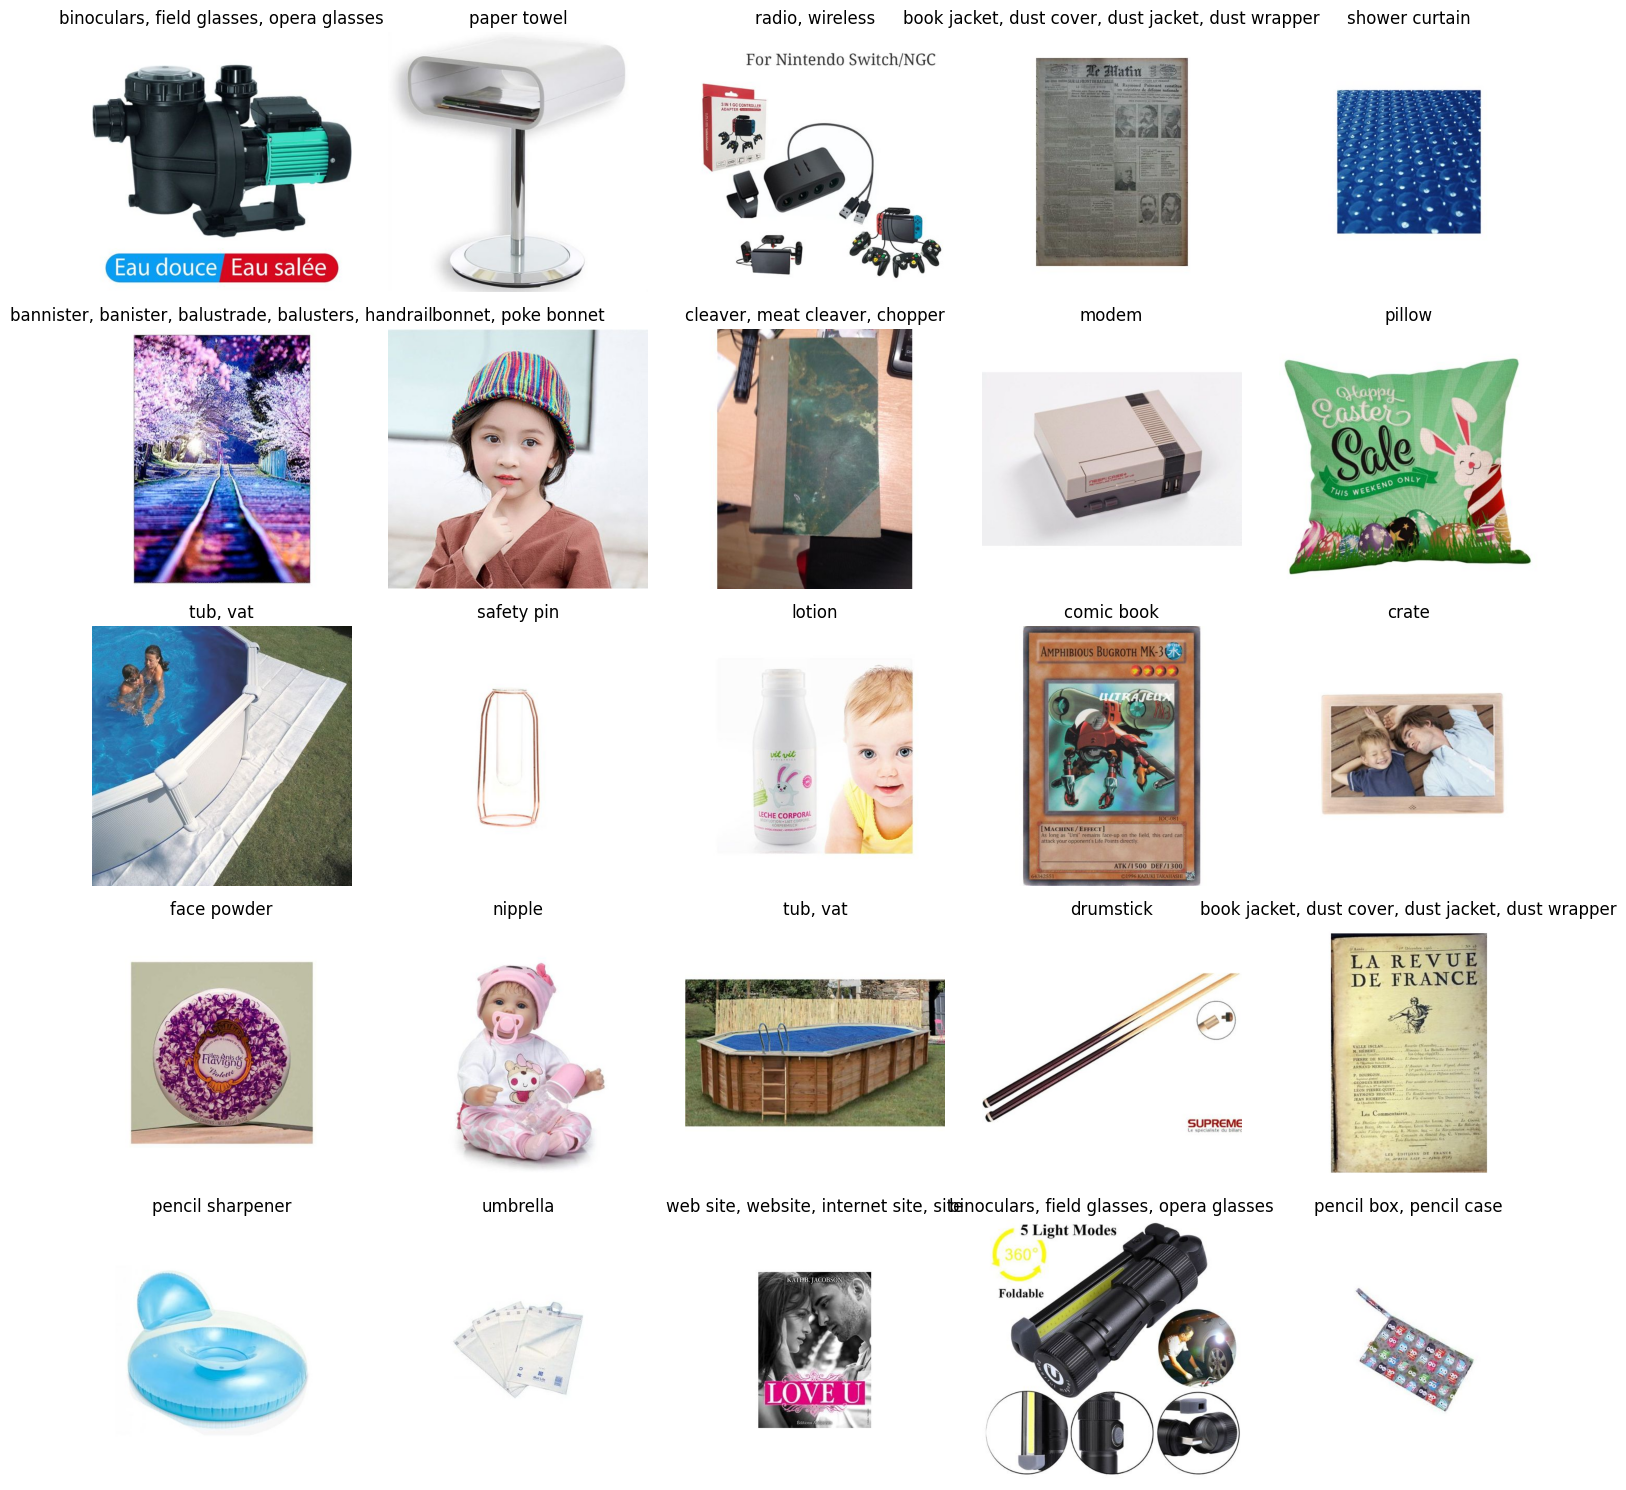

In [37]:
# Créer une figure pour afficher les images
plt.figure(figsize=(15, 15))

for i, fichier in enumerate(images_a_afficher):
    # Ouvrir l'image
    image = Image.open(os.path.join(dossier_images, fichier))

    img_preprocessed = preprocess(image)

    batch_img_tensor = torch.unsqueeze(img_preprocessed, 0)

    resnet101_model.eval()    
    out = resnet101_model(batch_img_tensor)
    with open("/Users/grizzly/Desktop/DataScientest/rakuten-multimodal-classification/data/imagenet_classes.txt") as f:
        labels = [line.strip() for line in f.readlines()]

    _, index = torch.max(out, 1)

    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

    #print(labels[index[0]], percentage[index[0]].item())

    _, indices = torch.sort(out, descending=True)
    [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

    # Ajouter une sous-figure
    plt.subplot(5, 5, i + 1)  # 2 lignes, 3 colonnes
    plt.imshow(image)
    plt.axis('off')  # Ne pas afficher les axes
    plt.title(f"{labels[index[0]]}")  # Titre avec le nom du fichier

# Afficher toutes les images
plt.tight_layout()
plt.show()

(Sauvegarder en tant que resnet_img2.png)

On remarque que le modèle est très performant lorsqu'il s'agit de détecter des piscines évidentes, comme on peut le voir sur les images 11 et 18. Cependant, un problème se pose : sur de nombreuses images, le modèle se trompe. En effet, par exemple, sur l'image 22, le modèle détecte un parapluie alors que ce sont des carnets/feuilles qui sont représentés. Cela peut créer du bruit supplémentaire si nous fournissons toutes ces informations à nos modèles. 

Voyons comment nous pouvons tout de même garder les informations pertinentes et éliminer celles qui pourraient diminuer les performances de nos modèles.

<h2><font size=6> Enrichissement du jeu de données textuels<a name="Enrichissement"></a></h2>

In [38]:
import pandas as pd

# Supposons que vos DataFrames sont déjà chargés comme suit :
X_train = pd.read_csv("../data/X_train_update.csv")
Y_train = pd.read_csv("../data/Y_train.csv")
resnet_pred = pd.read_csv("../data/resnet_features.csv")

# Réinitialiser l'index pour créer une colonne d'index
X_train.reset_index(drop=False, inplace=True)
Y_train.reset_index(drop=False, inplace=True)

# Joindre les DataFrames sur l'index
merged_df = pd.merge(X_train, Y_train, left_on='index', right_on='index')

final_df = pd.merge(resnet_pred, merged_df, left_on='imageid', right_on='imageid')
final_df = final_df[["resnet_pred", "prdtypecode"]]
final_df


resnet_pred  prdtypecode
0               binoculars, field glasses, opera glasses         2583
1                                            paper towel         1560
2                                        radio, wireless           40
3      book jacket, dust cover, dust jacket, dust wra...         2280
4                                         shower curtain         2583
...                                                  ...          ...
84911                               electric fan, blower         2583
84912                                        face powder         2403
84913                            scale, weighing machine           50
84914                                             lotion           10
84915                                              modem         1300

[84916 rows x 2 columns]

In [39]:
classe_resnet_df = pd.get_dummies(final_df['resnet_pred'])

final_df = pd.concat([final_df, classe_resnet_df], axis=1)
final_df = final_df.drop(['resnet_pred'], axis=1)

final_df.head()


prdtypecode  Afghan hound, Afghan  African chameleon, Chamaeleo chamaeleon  \
0         2583                 False                                    False   
1         1560                 False                                    False   
2           40                 False                                    False   
3         2280                 False                                    False   
4         2583                 False                                    False   

   African crocodile, Nile crocodile, Crocodylus niloticus  \
0                                              False         
1                                              False         
2                                              False         
3                                              False         
4                                              False         

   African elephant, Loxodonta africana  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4                                 False   

   African grey, African gray, Psittacus erithacus  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Airedale, Airedale terrier  American alligator, Alligator mississipiensis  \
0                       False                                          False   
1                       False                                          False   
2                       False                                          False   
3                       False                                          False   
4                       False                                          False   

   American lobster, Northern lobster, Maine lobster, Homarus americanus  \
0                                              False                       
1                                              False                       
2                                              False                       
3                                              False                       
4                                              False                       

   Angora, Angora rabbit  Appenzeller  \
0                  False        False   
1                  False        False   
2                  False        False   
3                  False        False   
4                  False        False   

   Arabian camel, dromedary, Camelus dromedarius  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Arctic fox, white fox, Alopex lagopus  Band Aid  Bedlington terrier  \
0                                  False     False               False   
1                                  False     False               False   
2                                  False     False               False   
3                                  False     False               False   
4                                  False     False               False   

   Bernese mountain dog  Blenheim spaniel  Boston bull, Boston terrier  \
0                 False             False                        False   
1                 False             False                        False   
2                 False             False                        False   
3                 False             False                        False   
4                 False             False                        False   

   Bouvier des Flandres, Bouviers des Flandres  Brabancon griffon  \
0                                        False              False   
1                                

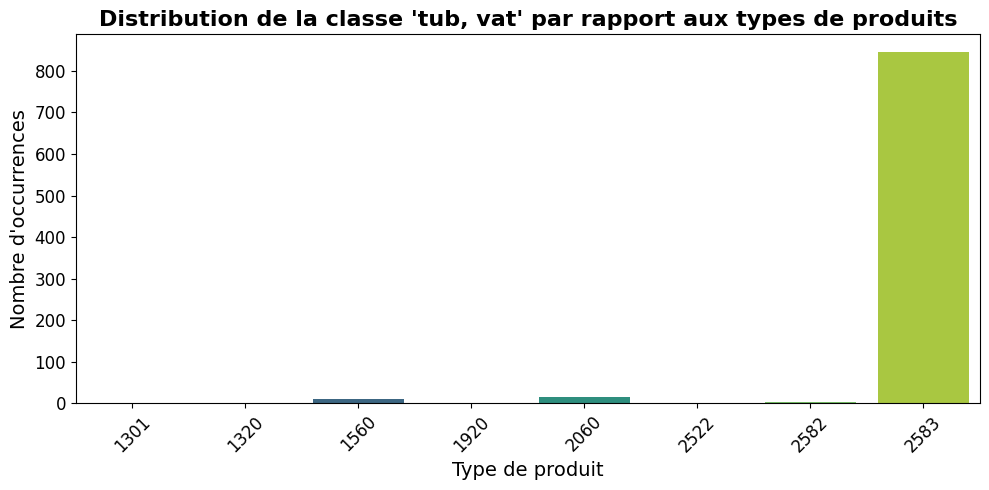

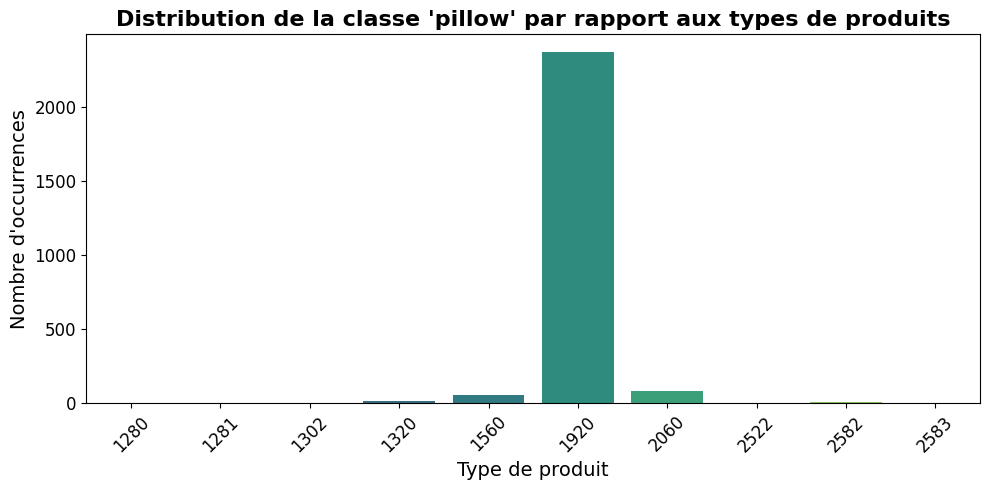

In [45]:
# Étape 1 : Calculer la distribution pour chaque classe
for cls in ["tub, vat", "pillow"]:
    # Filtrer le DataFrame pour les lignes où la classe est présente
    filtered_df = final_df[final_df[cls] == 1]
    
    # Compter les occurrences de chaque prdtypecode
    distribution = filtered_df['prdtypecode'].value_counts().reset_index()
    distribution.columns = ['prdtypecode', 'count']
    
    # Étape 2 : Visualiser la distribution
    plt.figure(figsize=(10, 5))
    bar_plot = sns.barplot(data=distribution, x='prdtypecode', y='count', palette='viridis')

    # Personnaliser le graphique
    plt.title(f"Distribution de la classe '{cls}' par rapport aux types de produits", fontsize=16, fontweight='bold')
    plt.xlabel('Type de produit', fontsize=14)
    plt.ylabel('Nombre d\'occurrences', fontsize=14)    
    plt.xticks(rotation=45, fontsize=12)  # Rotation des étiquettes pour une meilleure lisibilité
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Ajuster la mise en page
    plt.show()


Comme avec le modèle YOLO, nous avons des résultats intéressants. Ici aussi, la plupart des distributions ne nous apprennent rien. Cependant, il y a quelques distributions, comme celles des classes "tub, vat" et "pillow", qui montrent qu'elles sont significativement corrélées respectivement aux codes 2583 et 1920.

(Sauvegarder en tant que resnet_hist1.png (tub, vat) et resnet_hist2.png (pillow))

Une idée d'enrichissement de notre jeu de données textuels serait de conserver les prédictions des classes de ResNet qui sont significativement corrélées à celles de nos produits, c'est-à-dire celles dont plus de 50% de leurs prédictions sont associées à un produit spécifique et qui ont au moins 100 prédictions.

Regardons cela de plus près.

In [63]:
noms_classes_resnet = classe_resnet_df.columns
list_classe_resnet_50 = []

# Étape 1 : Calculer la distribution pour chaque classe
for cls in noms_classes_resnet:
    # Filtrer le DataFrame pour les lignes où la classe est présente
    filtered_df = final_df[final_df[cls] == 1]
    
    # Compter les occurrences de chaque prdtypecode
    distribution = filtered_df['prdtypecode'].value_counts().reset_index()
    distribution.columns = ['prdtypecode', 'count']

    # Calculer le pourcentage
    total_count = distribution['count'].sum()
    distribution['percentage'] = (distribution['count'] / total_count) * 100
    
    # Vérifier si le pourcentage est supérieur à 90 et imprimer "ok"
    for index, row in distribution.iterrows():
        if (row['percentage'] >= 50) and (row['count'].sum() >= 100):
            list_classe_resnet_50.append(cls)

print(f"Il y a {len(list_classe_resnet_50)} classes de ResNet qui ont au moins 100 prédictions, dont 50 % de leurs prédictions sont associées à un produit.")


Il y a 25 classes de ResNet qui ont au moins 100 prédictions, dont 50 % de leurs prédictions sont associées à un produit.


In [64]:
list_classe_resnet_50


['ballpoint, ballpoint pen, ballpen, Biro',
 'barber chair',
 'bathtub, bathing tub, bath, tub',
 'bib',
 'binoculars, field glasses, opera glasses',
 'bucket, pail',
 'clog, geta, patten, sabot',
 'desk',
 'dining table, board',
 'drum, membranophone, tympan',
 'file, file cabinet, filing cabinet',
 'folding chair',
 'oil filter',
 'pillow',
 'pool table, billiard table, snooker table',
 'quilt, comforter, comfort, puff',
 'racer, race car, racing car',
 'reflex camera',
 'solar dish, solar collector, solar furnace',
 'studio couch, day bed',
 'swimming trunks, bathing trunks',
 'teddy, teddy bear',
 'tub, vat',
 'vacuum, vacuum cleaner',
 'water bottle']